# Design a digital linear filter (DLF) for Laplace-to-time domain

### Note
Also, these filters are more *proof of concept* than *best* filters. Much more testing would be required to design a very good filter, and there certainly exist much better filters then these quickly designed ones.

In [1]:
import empymod
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

##  Example Laplace-transform pairs

### Diffusion functions$^\dagger$

The time-domain equivalent for $m=\{0,1,2\}$ are given by
$$
F^{(0)}(\tau, t) = \sqrt{\frac{\tau}{\pi t^3}}\exp(-\tau/t) H(t) \ , \\
$$

A more complex system would be given in Equation 4.120.
   
    
**References**  
$^\dagger$ Ziolkowski, A., and E. Slob, 2019, Introduction to Controlled-Source Electromagnetic Methods: Cambridge University Press; ISBN: [9781107058620](https://www.cambridge.org/9781107058620).  

In [3]:
def diff_0(tau=1):
    '''Diffusion Function Laplace transform pair for m=0.'''
 
    def lhs(l):
        return np.exp(-2*np.sqrt(l*tau))

    def rhs(r):
        return np.sqrt(tau/(np.pi*r**3))*np.exp(-tau/r)

    return empymod.fdesign.Ghosh('lap', lhs, rhs)

##  Transform pair using empymod

In [4]:
def empy_laplace(model, verblhs=0, verbrhs=0):
    r"""Numerical transform pair with empymod.

    Parameters
    ----------
    model : dict
        Will be passed as **model to empymod.dipole. Dict cannot contain
        'depth', signal', 'freqtime', 'xdirect', nor 'verb'.

    verblhs, verbrhs: int
        verb-values provided to empymod for lhs and rhs.

    """
    # rhs: empymod.model.analytical with signal
    def rhs(t):
        return empymod.dipole(depth=[], xdirect=True, signal=0, freqtime=t, verb=verbrhs, **model)

    # lhs: empymod.model.analytical
    def lhs(f): 
        out = empymod.dipole(depth=[], xdirect=True, freqtime=-f, verb=verblhs, **model)
        return out.reshape(f.shape)

    return empymod.fdesign.Ghosh('lap', lhs, rhs)

## Design a filter using empymod

   brute fct calls : 10201                                    
   fmin  fct calls : 110

   Filter length   : 201
   Best filter
   > Min field     : 5.36007e-21
   > Spacing       : 0.1045
   > Shift         : -1.3
   > Base min/max  : 7.889325e-06 / 9.414440e+03

:: empymod END; runtime = 0:07:49.316449 :: 

* QC: Overview of brute-force inversion:


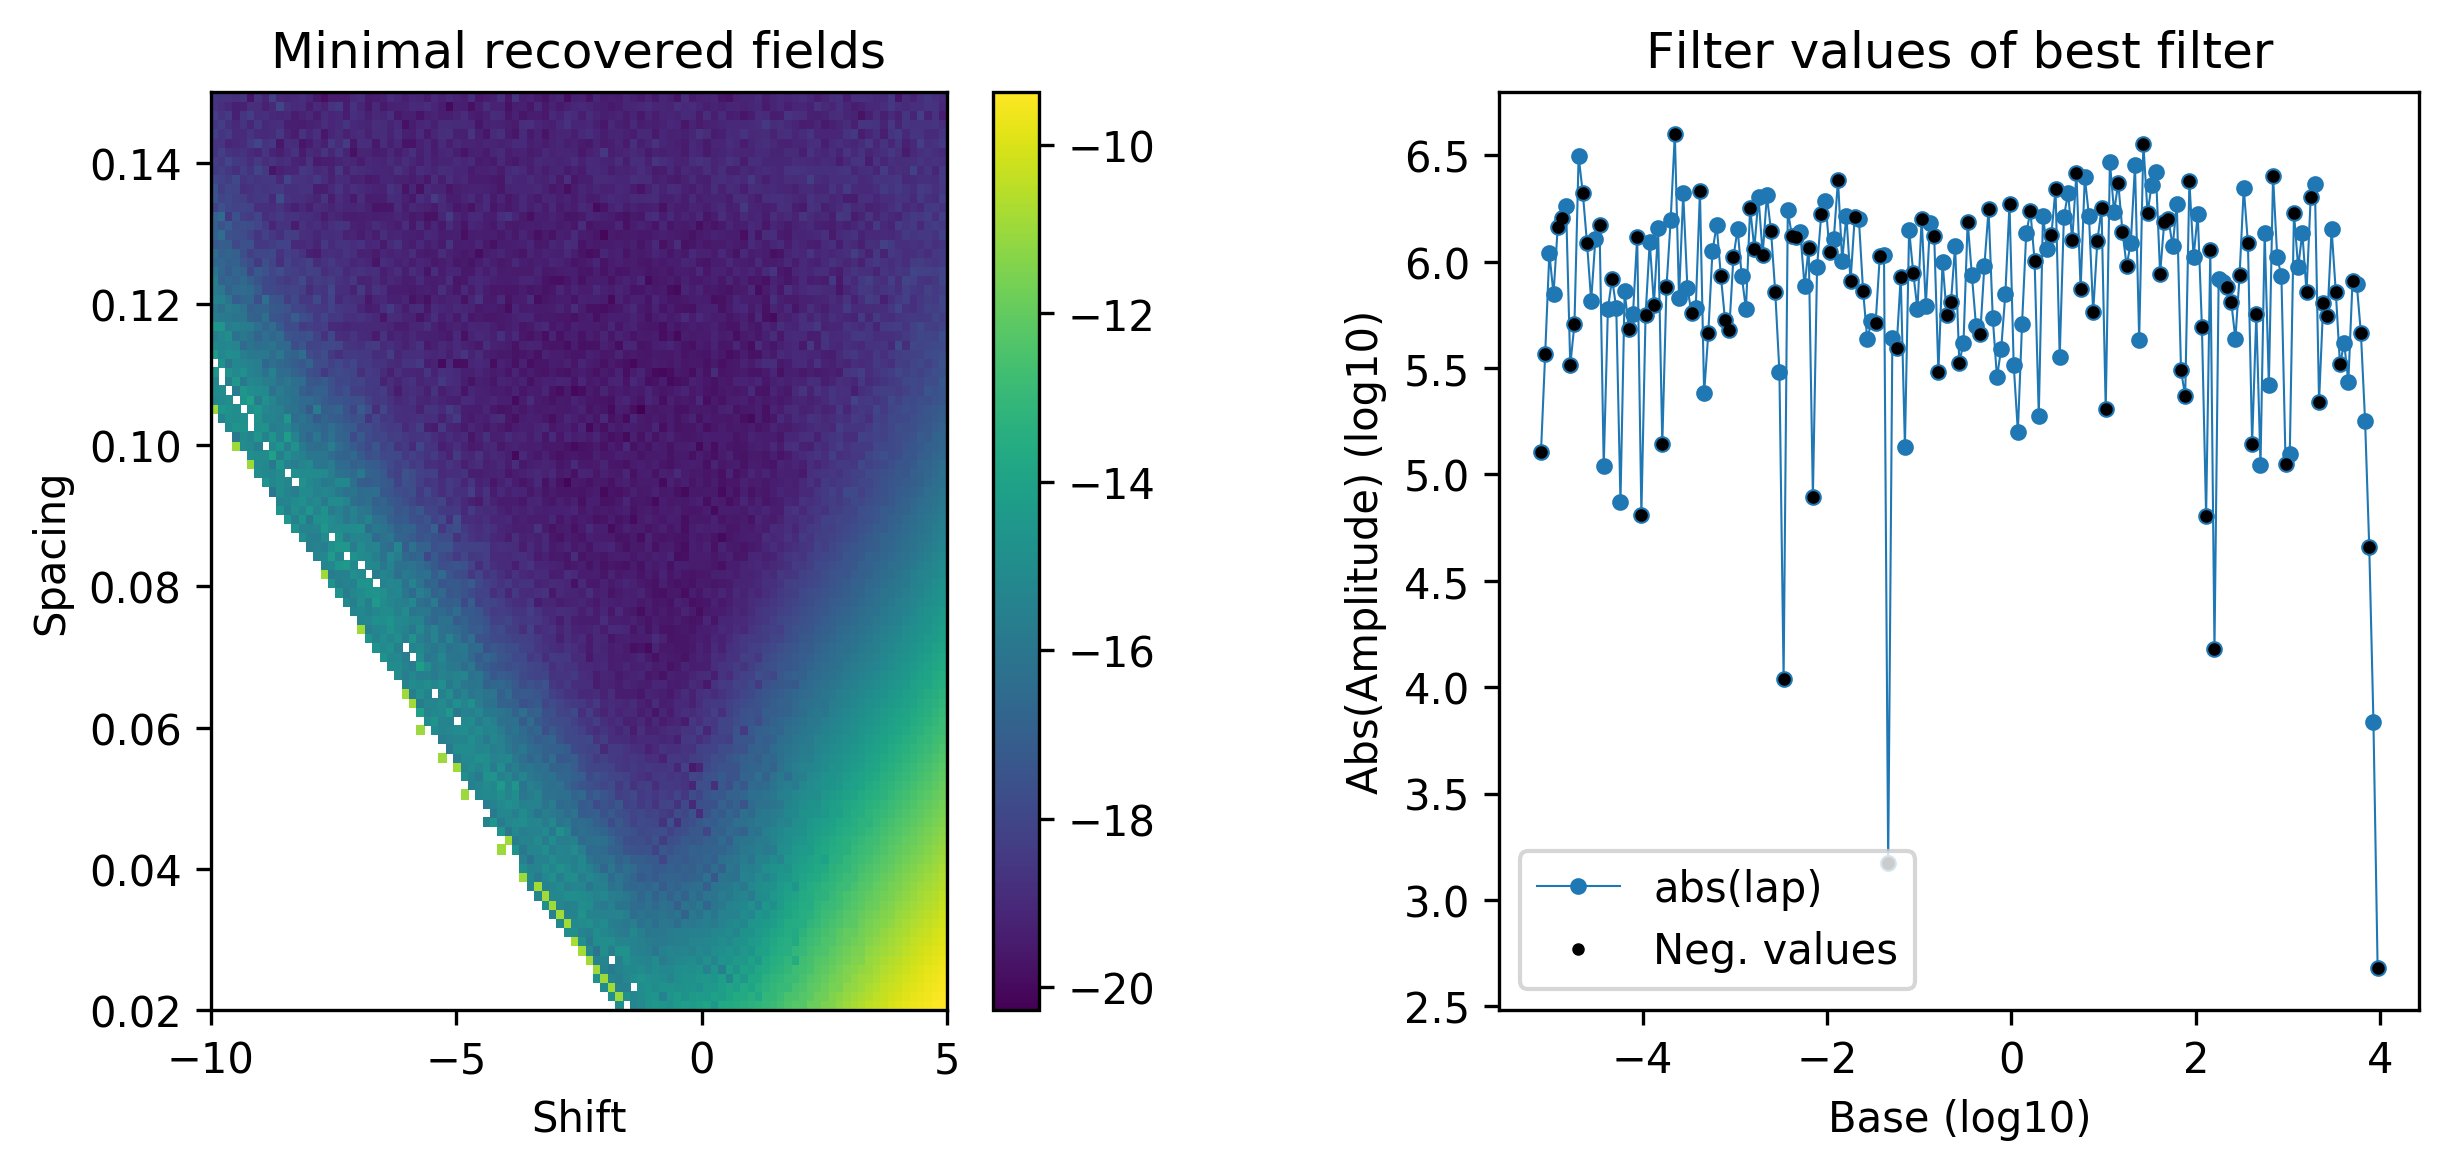

In [14]:
empymod.utils.set_minimum(min_freq=1e-40, min_time=1e-40)

model = {
    'src': [0, 0, 0],
    'rec': [1000, 0, 0],
    'res': 1
}

inp = {'r': np.logspace(-1.5, 5, 1001),
       'r_def': (1, 1, 2),
       'n': 201,
       ####### REFERENCE ###### 'name': 'lap_201_empy',
       'name': 'lap_201_empy3',
       'error': 1e-2,
       'full_output': True,
       'fI': diff_0(),
       'fC': empy_laplace(model),
       'plot': 1}

filt2, out2 = empymod.fdesign.design(
    spacing=(0.02, 0.15, 101), shift=(-10, 5, 101), save=True, finish=True,
    **inp)

In [13]:
empymod.Report()

--------------------------------------------------------------------------------
  Date: Thu Sep 05 19:52:56 2019 CEST

             Linux : OS
                 4 : CPU(s)
            x86_64 : Machine
             64bit : Architecture
            7.7 GB : RAM
           Jupyter : Environment

  Python 3.7.3 (default, Mar 27 2019, 22:11:17)  [GCC 7.3.0]

            1.16.4 : numpy
             1.2.1 : scipy
         1.8.4dev0 : empymod
             2.6.9 : numexpr
             7.5.0 : IPython
             3.1.1 : matplotlib

  Intel(R) Math Kernel Library Version 2019.0.4 Product Build 20190411 for
  Intel(R) 64 architecture applications
--------------------------------------------------------------------------------